<a target="_blank" href="https://colab.research.google.com/drive/1SSsI0naieeHjHcJkW22CqNIZwLHWjXmd?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🕷️ Extract Github Trending Repositories with Official Scrapegraph SDK

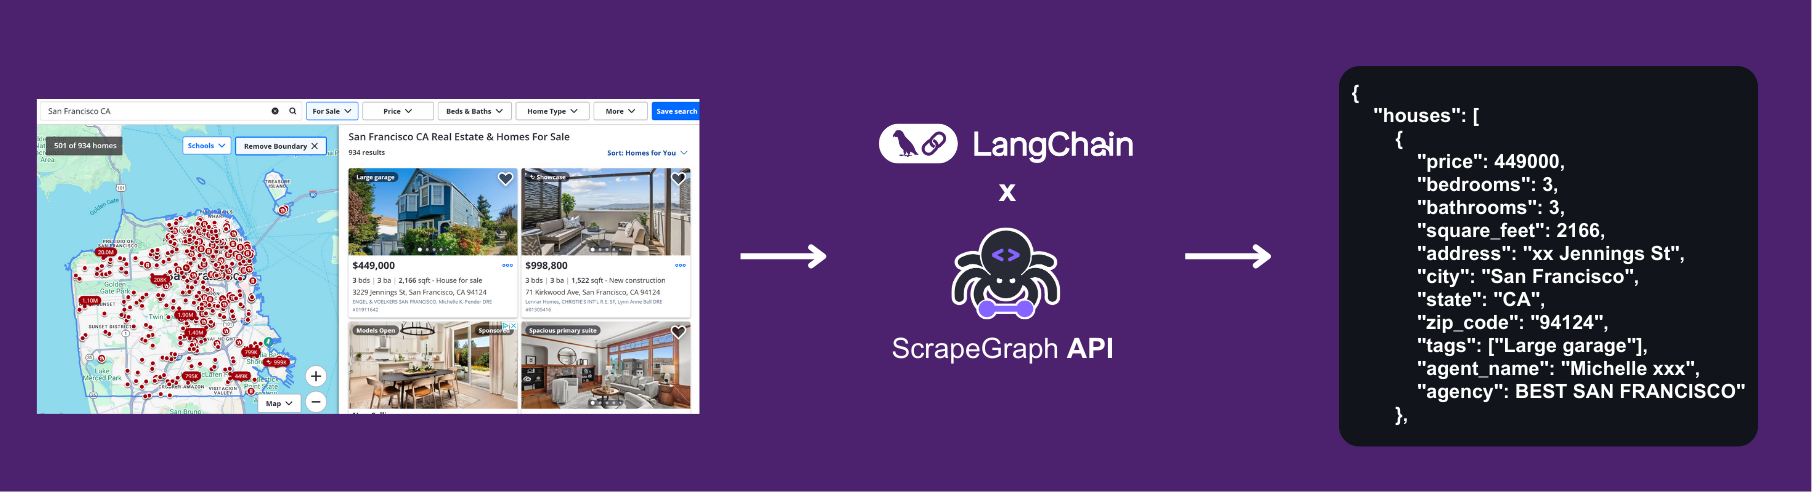


### 🔧 Install `dependencies`

In [ ]:
%%capture
!pip install scrapegraph-py

### 🔑 Import `ScrapeGraph` API key

You can find the Scrapegraph API key [here](https://dashboard.scrapegraphai.com/)

In [ ]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("SGAI_API_KEY")

if sgai_api_key:
    print("SGAI_API_KEY found in environment.")
else:
    print("SGAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your SGAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["SGAI_API_KEY"] = sgai_api_key
        print("SGAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")


SGAI_API_KEY not found in environment.
Please enter your SGAI_API_KEY: ··········
SGAI_API_KEY has been set in the environment.


### 📝 Defining an `Output Schema` for Webpage Content Extraction


If you already know what you want to extract from a webpage, you can **define an output schema** using **Pydantic**. This schema acts as a "blueprint" that tells the AI how to structure the response.

<details>
  <summary>Pydantic Schema Quick Guide</summary>

Types of Schemas  

1. Simple Schema  
Use this when you want to extract straightforward information, such as a single piece of content.  

```python
from pydantic import BaseModel, Field

# Simple schema for a single webpage
class PageInfoSchema(BaseModel):
    title: str = Field(description="The title of the webpage")
    description: str = Field(description="The description of the webpage")

# Example Output JSON after AI extraction
{
    "title": "ScrapeGraphAI: The Best Content Extraction Tool",
    "description": "ScrapeGraphAI provides powerful tools for structured content extraction from websites."
}
```

2. Complex Schema (Nested)  
If you need to extract structured information with multiple related items (like a list of repositories), you can **nest schemas**.

```python
from pydantic import BaseModel, Field
from typing import List

# Define a schema for a single repository
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Define a schema for a list of repositories
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of GitHub trending repositories")

# Example Output JSON after AI extraction
{
    "repositories": [
        {
            "name": "google-gemini/cookbook",
            "description": "Examples and guides for using the Gemini API",
            "stars": 8036,
            "forks": 1001,
            "today_stars": 649,
            "language": "Jupyter Notebook"
        },
        {
            "name": "TEN-framework/TEN-Agent",
            "description": "TEN Agent is a conversational AI powered by TEN, integrating Gemini 2.0 Multimodal Live API, OpenAI Realtime API, RTC, and more.",
            "stars": 3224,
            "forks": 311,
            "today_stars": 361,
            "language": "Python"
        }
    ]
}
```

Key Takeaways  
- **Simple Schema**: Perfect for small, straightforward extractions.  
- **Complex Schema**: Use nesting to extract lists or structured data, like "a list of repositories."  

Both approaches give the AI a clear structure to follow, ensuring that the extracted content matches exactly what you need.
</details>


In [ ]:
from pydantic import BaseModel, Field
from typing import List

# Schema for Trending Repositories
# This defines only the structure of how a single repository should look like
class RepositorySchema(BaseModel):
    name: str = Field(description="Name of the repository (e.g., 'owner/repo')")
    description: str = Field(description="Description of the repository")
    stars: int = Field(description="Star count of the repository")
    forks: int = Field(description="Fork count of the repository")
    today_stars: int = Field(description="Stars gained today")
    language: str = Field(description="Programming language used")

# Schema that contains a list of repositories
# This references the previous schema
class ListRepositoriesSchema(BaseModel):
    repositories: List[RepositorySchema] = Field(description="List of github trending repositories")

### 🚀 Initialize `SGAI Client` and start extraction

Initialize the client for scraping (there's also an async version [here](https://github.com/ScrapeGraphAI/scrapegraph-sdk/blob/main/scrapegraph-py/examples/async_smartscraper_example.py))

In [ ]:
from scrapegraph_py import Client

# Initialize the client with explicit API key
sgai_client = Client(api_key=sgai_api_key)

Here we use `Smartscraper` service to extract structured data using AI from a webpage.


> If you already have an HTML file, you can upload it and use `Localscraper` instead.





In [ ]:
# Request for Trending Repositories
repo_response = sgai_client.smartscraper(
    website_url="https://github.com/trending",
    user_prompt="Extract only the visible github trending repositories",
    output_schema=ListRepositoriesSchema,
)

Print the response

In [ ]:
import json

# Print the response
request_id = repo_response['request_id']
result = repo_response['result']

print(f"Request ID: {request_id}")
print("Trending Repositories:")
print(json.dumps(result, indent=2))

Request ID: 1e3b00ff-4b55-497c-8046-8ec5503cdafd
Trending Repositories:
{
  "repositories": [
    {
      "name": "Byaidu/PDFMathTranslate",
      "description": "PDF scientific paper translation with preserved formats - \u57fa\u4e8e AI \u5b8c\u6574\u4fdd\u7559\u6392\u7248\u7684 PDF \u6587\u6863\u5168\u6587\u53cc\u8bed\u7ffb\u8bd1\uff0c\u652f\u6301 Google/DeepL/Ollama/OpenAI \u7b49\u670d\u52a1\uff0c\u63d0\u4f9b CLI/GUI/Docker",
      "stars": 8902,
      "forks": 633,
      "today_stars": 816,
      "language": "Python"
    },
    {
      "name": "bigskysoftware/htmx",
      "description": "htmx - high power tools for HTML",
      "stars": 39143,
      "forks": 1324,
      "today_stars": 186,
      "language": "JavaScript"
    },
    {
      "name": "commaai/openpilot",
      "description": "openpilot is an operating system for robotics. Currently, it upgrades the driver assistance system on 275+ supported cars.",
      "stars": 50945,
      "forks": 9206,
      "today_stars": 132,
   

### 💾 Save the output to a `CSV` file

Let's create a pandas dataframe and show the table with the extracted content

In [ ]:
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(result["repositories"])
df

,name,description,stars,forks,today_stars,language
0,Byaidu/PDFMathTranslate,PDF scientific paper translation with preserve...,8902,633,816,Python
1,bigskysoftware/htmx,htmx - high power tools for HTML,39143,1324,186,JavaScript
2,commaai/openpilot,openpilot is an operating system for robotics....,50945,9206,132,Python
3,google-gemini/cookbook,Examples and guides for using the Gemini API,8108,1011,1221,Jupyter Notebook
4,stripe/stripe-ios,Stripe iOS SDK,2179,994,19,Swift
5,RIOT-OS/RIOT,RIOT - The friendly OS for IoT,5234,2017,168,C
6,zju3dv/EasyVolcap,EasyVolcap: Accelerating Neural Volumetric Vid...,802,52,30,Python
7,TEN-framework/TEN-Agent,TEN Agent is a conversational AI powered by TE...,3245,313,296,Python
8,DS4SD/docling,Get your documents ready for gen AI,15201,774,281,Python
9,Guovin/iptv-api,📺IPTV电视直播源更新工具：✨央视频、📱卫视、☕各省份地方台、🌏港·澳·台、🎥电影、🎮游戏...,9046,1938,101,Python


Save it to CSV

In [ ]:
# Save the DataFrame to a CSV file
csv_file = "trending_repositories.csv"
df.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")

Data saved to trending_repositories.csv


## 🔗 Resources


<p align="left">
  <img src="https://raw.githubusercontent.com/VinciGit00/Scrapegraph-ai/main/docs/assets/api-banner.png"
       alt="ScrapeGraph API Banner" width="600">
</p>


- 🚀 **Get your API Key:** [ScrapeGraphAI Dashboard](https://dashboard.scrapegraphai.com)  
- 🐙 **GitHub:** [ScrapeGraphAI GitHub](https://github.com/scrapegraphai)  
- 💼 **LinkedIn:** [ScrapeGraphAI LinkedIn](https://www.linkedin.com/company/scrapegraphai/)  
- 🐦 **Twitter:** [ScrapeGraphAI Twitter](https://twitter.com/scrapegraphai)  
- 💬 **Discord:** [Join our Discord Community](https://discord.gg/uJN7TYcpNa)  

Made with ❤️ by the [ScrapeGraphAI](https://scrapegraphai.com) Team  
